In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score

//anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
data = pd.read_csv("~/Desktop/studentapp/xAPI-Edu-Data.csv")

In [4]:
data.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [5]:
for column in ['Class']:
    data[column] = data[column].astype('category')
    data[column] = data[column].cat.codes

In [6]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,2


In [7]:
data.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [8]:
data = pd.get_dummies(data)

In [9]:
data.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,2,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,20,20,3,25,2,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,10,7,0,30,1,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,30,25,5,35,1,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,40,50,12,50,2,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [10]:
data.columns

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'Class', 'gender_F', 'gender_M', 'NationalITy_Egypt',
       'NationalITy_Iran', 'NationalITy_Iraq', 'NationalITy_Jordan',
       'NationalITy_KW', 'NationalITy_Lybia', 'NationalITy_Morocco',
       'NationalITy_Palestine', 'NationalITy_SaudiArabia', 'NationalITy_Syria',
       'NationalITy_Tunis', 'NationalITy_USA', 'NationalITy_lebanon',
       'NationalITy_venzuela', 'PlaceofBirth_Egypt', 'PlaceofBirth_Iran',
       'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan', 'PlaceofBirth_KuwaIT',
       'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco', 'PlaceofBirth_Palestine',
       'PlaceofBirth_SaudiArabia', 'PlaceofBirth_Syria', 'PlaceofBirth_Tunis',
       'PlaceofBirth_USA', 'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela',
       'StageID_HighSchool', 'StageID_MiddleSchool', 'StageID_lowerlevel',
       'GradeID_G-02', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06',
       'GradeID_G-07', 'GradeID_G-08', 'GradeI

In [11]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Class',axis=1),data['Class'], test_size=0.33, random_state=1)



In [12]:
from sklearn.metrics import accuracy_score

In [13]:
from sklearn.metrics import log_loss

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model1 = LogisticRegression(C=100.0,random_state=0)

In [18]:
model1.fit(X_train,y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
labels1 = model1.predict(X_test)

In [20]:
labels_1 = model1.predict_proba(X_test)

In [21]:
log_loss(y_test, labels_1)

0.65849450008047139

In [24]:
from sklearn.metrics import confusion_matrix

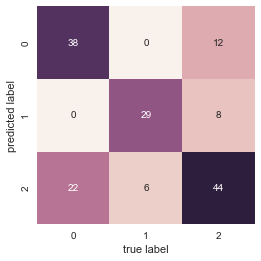

In [25]:
mat1 = confusion_matrix(y_test, labels1)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [27]:
accuracy_score(y_test, labels1)

0.69811320754716977

In [28]:
from sklearn.svm import SVC

In [31]:
model2 = SVC(kernel='linear', C=1.0, random_state=0, probability=True)

In [32]:
model2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [33]:
labels2 = model2.predict(X_test)

In [34]:
labels_2 = model2.predict_proba(X_test)

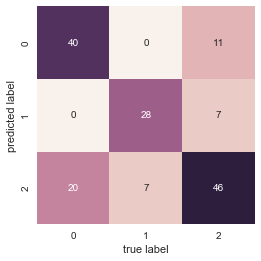

In [35]:
mat2 = confusion_matrix(y_test, labels2)
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [36]:
accuracy_score(y_test, labels2)

0.71698113207547165

In [37]:
log_loss(y_test, labels_2)

0.60009774792816151

In [38]:
model3 = SVC(kernel='rbf', C=1.0, random_state=0, gamma=100.0, probability=True)

In [39]:
model3.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=100.0, kernel='rbf',
  max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
  verbose=False)

In [40]:
labels3 = model3.predict(X_test)

In [41]:
labels_3 = model3.predict_proba(X_test)

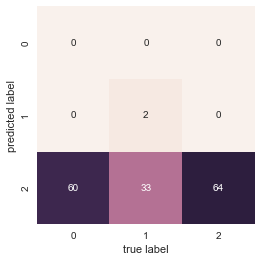

In [42]:
mat3 = confusion_matrix(y_test, labels3)
sns.heatmap(mat3.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [43]:
log_loss(y_test,labels_3)

1.1568174914888678

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
model4 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [46]:
model4.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [47]:
labels4 = model4.predict(X_test)

In [48]:
labels_4 = model4.predict_proba(X_test)

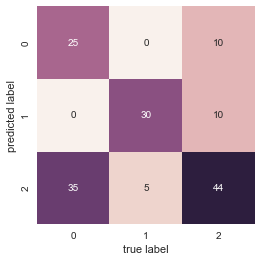

In [49]:
mat4 = confusion_matrix(y_test, labels4)
sns.heatmap(mat4.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [50]:
log_loss(y_test,labels_4)

1.5331058610007173

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
model5 = RandomForestClassifier(criterion='entropy',
                               n_estimators=29,
                               random_state=0)

In [53]:
model5.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=29, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [54]:
labels5 = model5.predict(X_test)

In [55]:
labels_5 = model5.predict_proba(X_test)

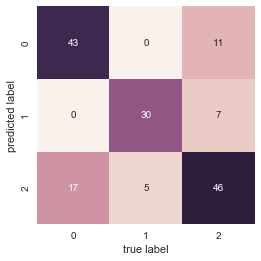

In [56]:
mat5 = confusion_matrix(y_test, labels5)
sns.heatmap(mat5.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [57]:
log_loss(y_test,labels_5)

0.51932878037020047

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
model6 = KNeighborsClassifier(n_neighbors=5,p=2,
                             metric='minkowski')

In [60]:
model6.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [61]:
labels6 = model6.predict(X_test)

In [62]:
labels_6 = model6.predict_proba(X_test)

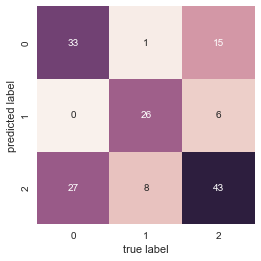

In [63]:
mat6 = confusion_matrix(y_test, labels6)
sns.heatmap(mat6.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [64]:
log_loss(y_test,labels_6)

2.488182334360336

In [1]:
#SERIALIZING FITTED SCIKIT-LEARN ESTIMATORS


In [76]:
import pickle
with open('model5.pkl', 'wb') as fid:
    pickle.dump(model5, fid,2) 

In [77]:
#Create a Dataframe with only the dummy variables
cat = data.drop('Class',axis=1)
index_dict = dict(zip(cat.columns,range(cat.shape[1])))

with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2)